In [15]:
import numpy as np
import os
import pandas as pd
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import openpyxl
import matplotlib as mpl
import scipy as sp
from scipy import stats
from scipy import signal
from scipy import fft
from scipy import io
from scipy import interpolate
from scipy import optimize
from scipy import linalg
from scipy import integrate
from scipy.fft import dct

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
    r'\usepackage{textcomp}',
    r'\usepackage{wasysym}']
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.size'] = 22
mpl.rcParams['font.family'] = 'STIXGeneral'

#from MEM_class import MEM

#from synthData_Gen import SyntheticData_Gen

# Isotope types examples

In [2]:
saveFigs = True

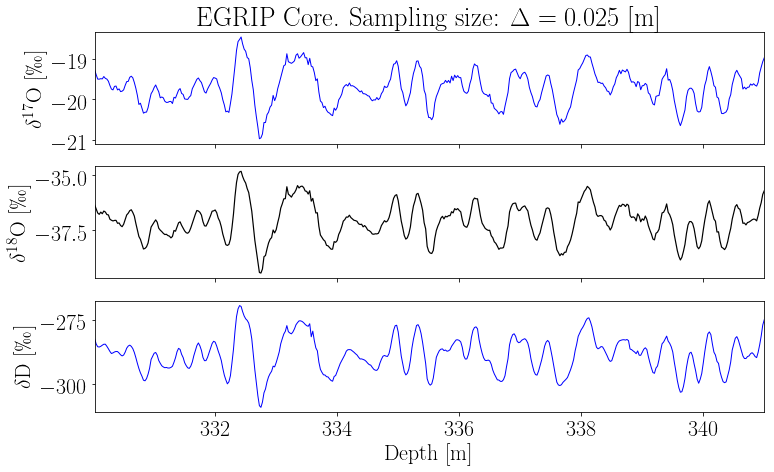

In [16]:
iso_ex = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/egrip22pbag_601_620_1st.out', '\t')
sampleSize = iso_ex['Depth'][1] - iso_ex['Depth'][0]

figIso, axIso = plt.subplots(3,1, figsize=(12,7), sharex=True)

axIso[0].plot(iso_ex['Depth'], iso_ex['d17'],'b',lw=1)
axIso[1].plot(iso_ex['Depth'], iso_ex['d18'],'k',lw=1.2)
axIso[2].plot(iso_ex['Depth'], iso_ex['dD'],'b',lw=1)

axIso[0].set(ylabel='$\delta ^{17}$O [\permil]', title=f'EGRIP Core. Sampling size: $\Delta = $ {sampleSize:.3f} [m]')
axIso[1].set(ylabel='$\delta ^{18}$O [\permil]')
axIso[2].set(xlabel='Depth [m]', ylabel='$\delta$D [\permil]', xlim=(iso_ex['Depth'].min(),iso_ex['Depth'].max()));

if saveFigs:
    figIso.savefig('../../WrittenWork/NovemberPresentation/d17d18dD_ExamplesEGRIP.eps')

# Site A analysis

In [7]:
siteA_dens = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/Site_A_Densities.txt', '\t')
siteA_atten = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/Site_A_Attenuation.txt', '\t')
siteA_aso = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/Site_A_WaterIsotopes.txt', '\t')

### Site A density

In [8]:
Temp0 = 243.75 # [K]
bdot0 = 0.307#0.267764 # [m W.E.]
dens0 = siteA_dens['rho_measured'][0] # [kg/m^3]
z_vec = siteA_dens['depth']
rho_vec = siteA_dens['rho_measured']

In [9]:
import sys

sys.path.insert(1, '/home/thea/Documents/KUFysik/MesterTesen/Analysis/')
import HL_AnalyticThea_class

In [10]:
from HL_AnalyticThea_class import HL_Thea

hl_inst = HL_Thea(z_meas = z_vec, rho_meas = rho_vec,\
                     Acc_0 = bdot0, Temp_0 = Temp0, rho_0 = dens0, opti = False)
hl_model = hl_inst.model(z_vec)

hl_instOpti = HL_Thea(z_meas = z_vec, rho_meas = rho_vec,\
                     Acc_0 = bdot0, Temp_0 = Temp0, rho_0 = dens0, opti = True)

hl_modelOpti = hl_instOpti.model(z_vec)
f0 = hl_modelOpti['f0_fin']; f1 = hl_modelOpti['f1_fin']

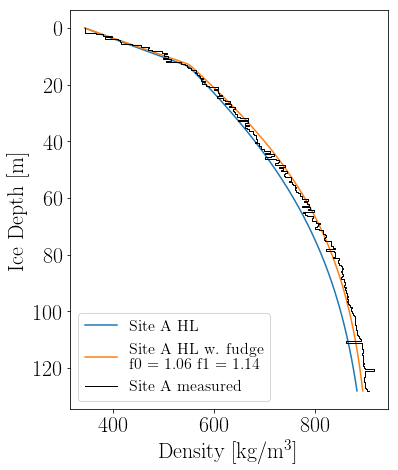

In [17]:
fig1, ax1 = plt.subplots(figsize=(6,7))

ax1.set(xlabel='Density [kg/m$^3$]', ylabel='Ice Depth [m]')
ax1.invert_yaxis()
ax1.plot(hl_model['rhoHL']*1000, z_vec, label='Site A HL')
ax1.plot(hl_modelOpti['rhoHL']*1000, z_vec, label=f'Site A HL w. fudge\nf0 = {f0:.2f} f1 = {f1:.2f}')

ax1.step(rho_vec, z_vec,'k',lw=1,label='Site A measured')
ax1.legend(fontsize=16)
fig1.tight_layout()
if saveFigs:
    fig1.savefig('../../WrittenWork/NovemberPresentation/SiteA_HLdensity.eps')

### Site A diffusion

In [18]:
sys.path.insert(1, '/home/thea/Documents/KUFysik/MesterTesen/Analysis/')
import sigma
from sigma import SigmaToolbox


In [19]:
sigma_inst = SigmaToolbox()
sigma_arr = sigma_inst.experiment2(P = 1, temp = Temp0, accum = bdot0, rho_o = dens0, \
                        fo = f0, f1 = f1, dz = 0.55, z_final = max(z_vec), fileout = False)

0.0 343.46999999999997 0.0
0.55 351.9204270454646 0.0
1.1 360.4480970549122 0.022317040625256437
1.6500000000000001 369.04745299455396 0.03079689783338539
2.2 377.712733319107 0.030090372134588133
2.75 386.4379860883312 0.035968439980654396
3.3000000000000003 395.2170842254659 0.040538796863669714
3.8500000000000005 404.04374184246973 0.04423820982635827
4.4 412.91153154604535 0.043288139141400776
4.95 421.813902628195 0.04630569951354195
5.5 430.74420003567843 0.04884296856266295
6.050000000000001 439.6956840043837 0.0509967765964762
6.6000000000000005 448.66155023739066 0.05283264268009013
7.15 457.6349504995529 0.05440343176567568
7.700000000000001 466.6090134968193 0.05574705128209016
8.25 475.5768659053602 0.05469584092273548
8.8 484.53165341389115 0.05584525562525024
9.350000000000001 493.466561642445 0.05682918158119555
9.9 502.37483680221294 0.05766984686870458
10.450000000000001 511.24980596395955 0.05838375523300131
11.0 520.0848968068337 0.05898703976631863
11.55 528.8736567

91.30000000000001 859.354896661244 0.06579204740340618
91.85000000000001 860.2192707760715 0.06572574283282587
92.4 861.0715273459717 0.0656606899372627
92.95 861.9118110759725 0.0655966768807691
93.50000000000001 862.7402656990184 0.06553388122168656
94.05000000000001 863.5570339579531 0.06547189806138348
94.60000000000001 864.3622575884921 0.06541090567191665
95.15 865.1560773031603 0.06535088821629347
95.7 865.938632776169 0.06529163664820965
96.25000000000001 866.7100626292114 0.0652335227300308
96.80000000000001 867.4705044181502 0.06517633773472438
97.35000000000001 868.2200946205759 0.06512025976799578
97.9 868.9589686242106 0.06506488814656158
98.45 869.6872607161362 0.06501040161371281
99.00000000000001 870.4051040728241 0.064956593552028
99.55000000000001 871.1126307509436 0.06490383513568154
100.10000000000001 871.8099716789249 0.06485192003710118
100.65 872.4972566492596 0.06480083477626034
101.2 873.1746143115134 0.06475075794784277
101.75000000000001 873.8421721660311 0.0

In [20]:
LakiDepth = 80.85
TambDepth = 70.90

z_LT = z_vec[(z_vec >= TambDepth) & (z_vec <= LakiDepth)]
sigma_LT = sigma_arr[(z_vec >= TambDepth) & (z_vec <= LakiDepth)]


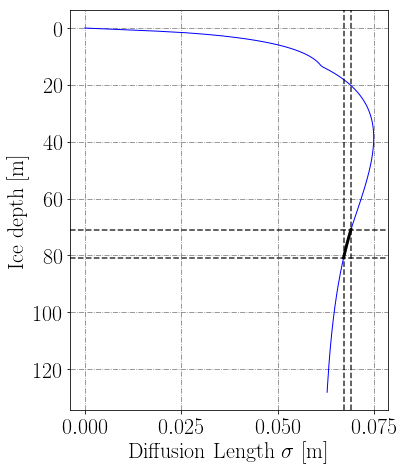

In [21]:
figDiff, axDiff = plt.subplots(figsize=(6,7))

axDiff.set(xlabel='Diffusion Length $\sigma$ [m]', ylabel='Ice depth [m]')
axDiff.invert_yaxis()
axDiff.plot(sigma_arr,z_vec, 'b', lw=1)
axDiff.plot(sigma_LT,z_LT, 'k', lw=3)
axDiff.axhline(y = TambDepth, alpha=0.8, color='k', ls='--', lw=1.5)
axDiff.axhline(y = LakiDepth, alpha=0.8, color='k', ls='--', lw=1.5)
axDiff.axvline(x = sigma_LT[0], alpha=0.8, color='k', ls='--', lw=1.5)
axDiff.axvline(x = sigma_LT[-1], alpha=0.8, color='k', ls='--', lw=1.5)

axDiff.grid(True, color='grey',ls='-.')
figDiff.tight_layout()
if saveFigs:
    figDiff.savefig('../../WrittenWork/NovemberPresentation/SiteA_DiffLen.eps')

In [22]:
sigmaA_max = sigma_LT[0]
sigmaA_min = sigma_LT[-1]

In [26]:

SiteA = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/SiteA_det.txt', ' ')[1:]
depth_siteA =SiteA['depth']
d18O_siteA = SiteA['d18O']

depthA_LT = depth_siteA[(depth_siteA >= TambDepth) & (depth_siteA <= LakiDepth)]
d18OA_LT = d18O_siteA[(depth_siteA >= TambDepth) & (depth_siteA <= LakiDepth)]

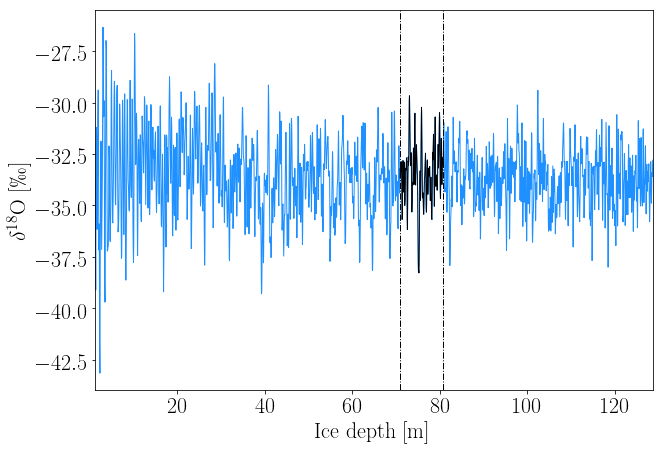

In [27]:
figA_Iso, axA_Iso = plt.subplots(figsize=(10,7))

axA_Iso.plot(depth_siteA, d18O_siteA,'dodgerblue',lw=1)
axA_Iso.plot(depthA_LT, d18OA_LT,'k',lw=0.8)
axA_Iso.set(xlim=(depth_siteA.min(), depth_siteA.max()), xlabel='Ice depth [m]',ylabel='$\delta ^{18}$O [\permil]')
axA_Iso.axvline(x=TambDepth,color='k',lw=1, ls='-.')
axA_Iso.axvline(x=LakiDepth,color='k',lw=1, ls='-.')

if saveFigs:
    figA_Iso.savefig('../../WrittenWork/NovemberPresentation/SiteA_FullIso.eps')

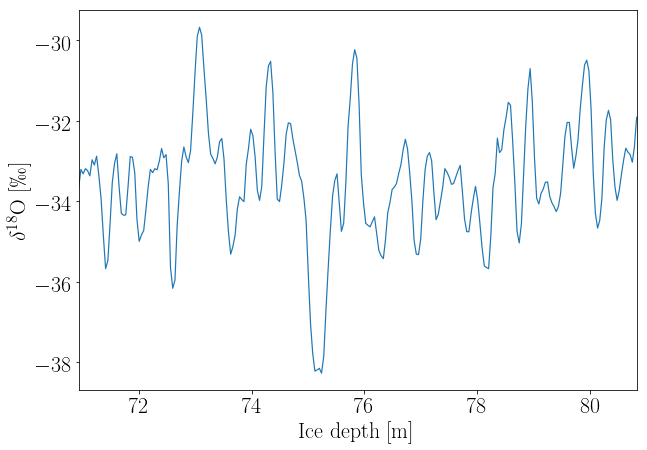

In [28]:
figA_IsoLT, axA_IsoLT = plt.subplots(figsize=(10,7))

axA_IsoLT.plot(depthA_LT, d18OA_LT,lw=1.2)
axA_IsoLT.set(xlim=(depthA_LT.min(),depthA_LT.max()), xlabel='Ice depth [m]',ylabel='$\delta ^{18}$O [\permil]')

if saveFigs:
    figA_IsoLT.savefig('../../WrittenWork/NovemberPresentation/SiteA_LTIso.eps')

In [29]:
from scipy import interpolate

def interpCores(valMin, valMax, d_in, x_in):
    d = d_in[(d_in >= valMin) & (d_in <= valMax)]
    x = x_in[(d_in >= valMin) & (d_in <= valMax)]
    
    diff = np.diff(d)
    Delta = round(min(diff), 3)
    
    d_min = Delta * np.ceil(d.values[0]/Delta)
    d_max = Delta * np.floor(d.values[-1]/Delta)

    n = int(1 + (d_max - d_min)/Delta)
    
    j_arr = np.linspace(0,n,n)
    dhat = d_min + (j_arr - 1)*Delta
    
    f = interpolate.CubicSpline(d,x)
    
    xhat = f(dhat)
    
    return dhat, xhat, Delta

In [30]:
depthA_LT_int, d18OA_LT_int, Delta = interpCores(np.asarray(depthA_LT)[0], np.asarray(depthA_LT)[-1], depthA_LT, d18OA_LT)

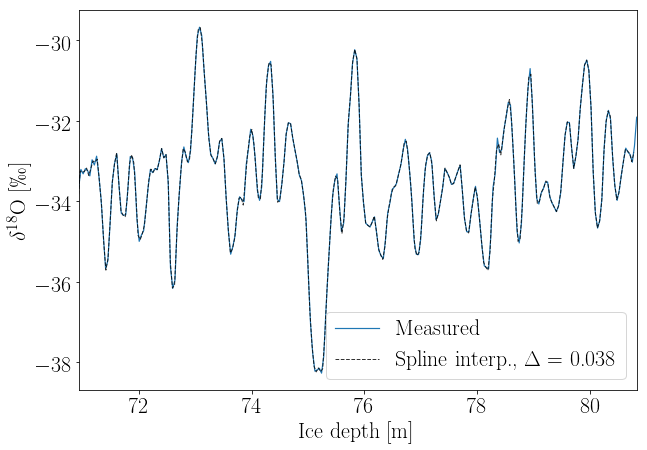

In [31]:
figA_IsoLT, axA_IsoLT = plt.subplots(figsize=(10,7))

axA_IsoLT.plot(depthA_LT, d18OA_LT,lw=1.2, label='Measured')
axA_IsoLT.plot(depthA_LT_int, d18OA_LT_int,color='k',lw=1, alpha=0.8, linestyle='--', label='Spline interp., $\Delta =$ '+f'{Delta:.3f}')
axA_IsoLT.set(xlim=(depthA_LT.min(),depthA_LT.max()), xlabel='Ice depth [m]',ylabel='$\delta ^{18}$O [\permil]')
axA_IsoLT.legend()

if saveFigs:
    figA_IsoLT.savefig('../../WrittenWork/NovemberPresentation/SiteA_LTIso_int.eps')

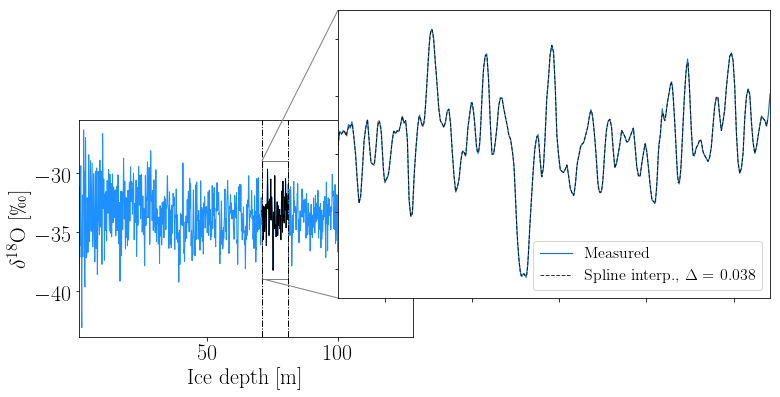

In [32]:
figA_Iso, axA_Iso = plt.subplots(figsize=(6,4))
plt.rcParams.update({'font.size': 22})

axA_Iso.plot(depth_siteA, d18O_siteA,'dodgerblue',lw=1)
axA_Iso.plot(depthA_LT, d18OA_LT,'k',lw=0.8)
axA_Iso.set(xlim=(depth_siteA.min(), depth_siteA.max()), xlabel='Ice depth [m]',ylabel='$\delta ^{18}$O [\permil]')
axA_Iso.axvline(x=TambDepth,color='k',lw=1, ls='-.')
axA_Iso.axvline(x=LakiDepth,color='k',lw=1, ls='-.')

x1 = depthA_LT.min()
x2 = depthA_LT.max()
y1 = -39
y2 = -29

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

axins = inset_axes(axA_Iso, 6,4, loc=2, bbox_to_anchor=(0.7,0.3,1,1), bbox_transform=axA_Iso.figure.transFigure)#loc=5) # zoom = 2
axins.plot(depthA_LT, d18OA_LT, label='Measured', lw=1.2)
axins.plot(depthA_LT_int, d18OA_LT_int,color='k',lw=1, alpha=0.8, linestyle='--', label='Spline interp., $\Delta =$ '+f'{Delta:.3f}')
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.legend(fontsize=16)
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(axA_Iso, axins, loc1=2, loc2=3, fc="none", ec="0.5")
#plt.draw()
#plt.show()

if saveFigs:
    figA_Iso.savefig('../../WrittenWork/NovemberPresentation/SiteA_Iso_int_Inset.eps', bbox_inches = 'tight')

In [33]:
from Decon import SpectralDecon

decon_inst = SpectralDecon(depthA_LT_int, d18OA_LT_int, 2000)

In [34]:
a,b = decon_inst.plotSpectrum(showFig=False)
print(f'Estimated min. Diff. Len (anal.): {sigmaA_min*100:.3f}')
print(f'Estimated max. Diff. Len (anal.): {sigmaA_max*100:.3f}')

Using default boundaries for variance and a1
Diff. len., fit [cm]: 7.329
Estimated min. Diff. Len (anal.): 6.703
Estimated max. Diff. Len (anal.): 6.895


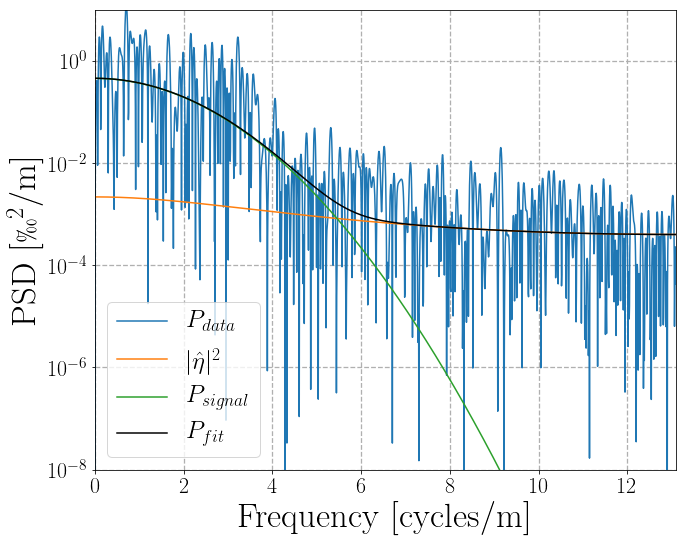

In [35]:

b.set_xlabel('Frequency [cycles/m]',fontsize=35)
b.set_ylabel('PSD [\permil$^2$/m]',fontsize=35)
b.set_ylim((1e-8,10))
b.legend(fontsize=25)
if saveFigs:
    a.tight_layout()
    a.savefig('../../WrittenWork/NovemberPresentation/SiteA_PSD.eps')
a

In [36]:
sigma_min = sigmaA_min
sigma_max = 8.5/100

sigma_in = np.linspace(sigma_min-0.01,sigma_max,10)
sigma_in

array([0.05703427, 0.06014158, 0.06324888, 0.06635618, 0.06946349,
       0.07257079, 0.07567809, 0.07878539, 0.0818927 , 0.085     ])

In [37]:
c = []

for i in range(len(sigma_in)):
    c.append(decon_inst.Filters(sigma=sigma_in[i]))


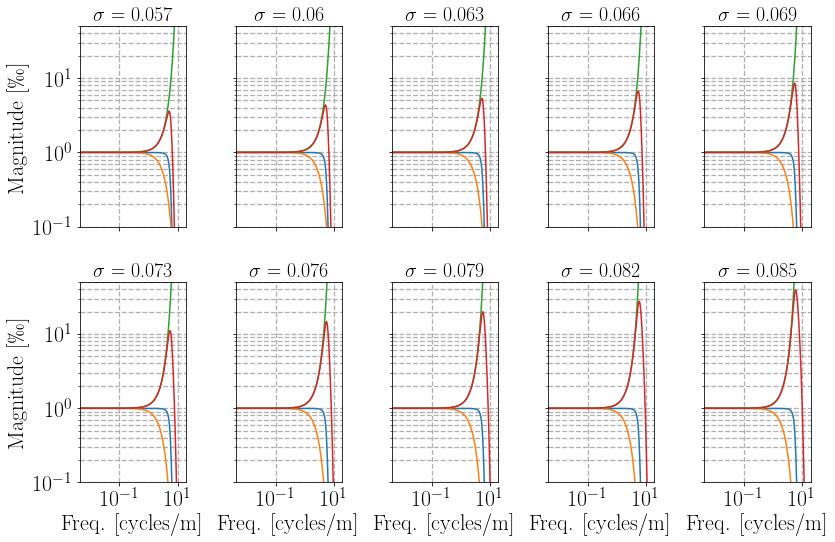

In [38]:
fig, axes = plt.subplots(2,5,figsize=(12,8), sharey=True, sharex=True)
plt.rcParams.update({'font.size': 22})

axes.titlesize:'x-large'
axes.labelsize:'large'
#plt.rcParams.update({'title.size': 18})
for i, ax in zip(range(len(sigma_in)), axes.flatten()):
    ax.grid(linestyle='--',lw=1.3, which='both')
    ax.loglog(c[i][0], c[i][1])
    ax.loglog(c[i][0], c[i][2])
    ax.loglog(c[i][0], c[i][2]**(-1))
    ax.loglog(c[i][0], c[i][3])
    ax.set_title('$\sigma$ = ' + str(round(sigma_in[i],3)),fontsize=20)
    ax.set(ylim=(1e-1,50))#, xlabel='Freq. [cycles/m]', ylabel='Magnitude [\permil]')
axes.flatten()[0].set(ylabel='Magnitude [\permil]'); axes.flatten()[5].set(ylabel='Magnitude [\permil]', xlabel='Freq. [cycles/m]');
axes.flatten()[6].set(xlabel='Freq. [cycles/m]'); axes.flatten()[7].set(xlabel='Freq. [cycles/m]'); 
axes.flatten()[8].set(xlabel='Freq. [cycles/m]'); axes.flatten()[9].set(xlabel='Freq. [cycles/m]'); 

#ax.legend(labels= ['$\phi$', '$M$', '$M^{-1}$', '$R = \phi \cdot M^{-1}$'],bbox_to_anchor=(1,1.4), fontsize=16)
fig.tight_layout()

if saveFigs:
    fig.savefig('../../WrittenWork/NovemberPresentation/SiteA_Filters.eps')

In [39]:
e = []

for i in range(len(sigma_in)):
    e.append(decon_inst.deconvolve(sigma=sigma_in[i]))


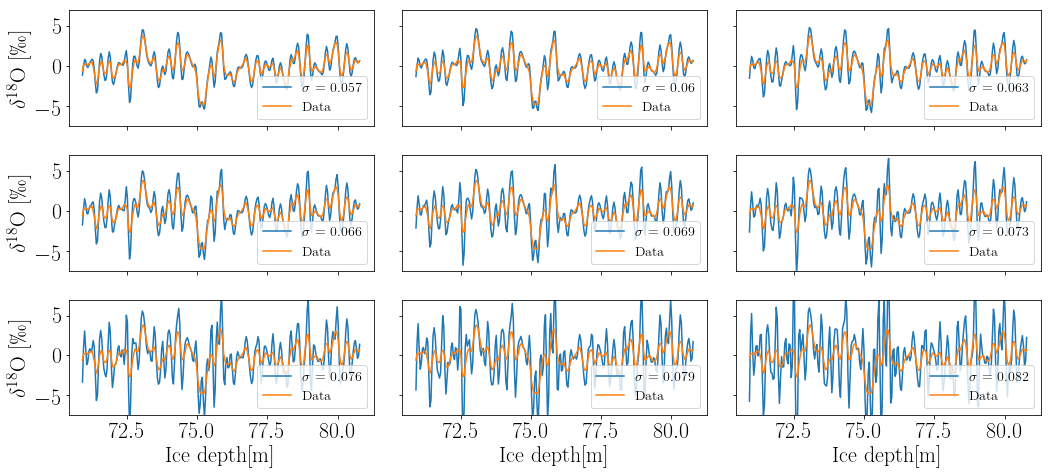

In [40]:
figDecon, axesDecon = plt.subplots(3,3,figsize=(15,7), sharex=True, sharey=True)
plt.rcParams.update({'font.size': 20})
axes.titlesize:'x-large'

for i, ax in zip(range(len(sigma_in)), axesDecon.flatten()):
    ax.plot(e[i][0], e[i][1], label='$\sigma$ = ' + str(round(sigma_in[i],3)))
    ax.plot(depthA_LT_int, d18OA_LT_int-np.mean(d18OA_LT_int), label='Data')
    ax.legend(fontsize=14)
    ax.set(ylim=(-7.5,7))
#    ax.set_title('$\sigma$ = ' + str(round(sigma_in[i],3)),fontsize=12)
#    ax.set(xlabel='Ice depth[m]', ylabel='$\delta ^{18}$O [\permil] (Detrend.)')
axes = axesDecon.flatten()
axes[6].set(xlabel='Ice depth[m]', ylabel='$\delta ^{18}$O [\permil]')
axes[7].set(xlabel='Ice depth[m]')
axes[8].set(xlabel='Ice depth[m]')
axes[0].set(ylabel='$\delta ^{18}$O [\permil]')
axes[3].set(ylabel='$\delta ^{18}$O [\permil]')
axes[6].set(ylabel='$\delta ^{18}$O [\permil]')


#ax.legend(labels= ['Decon', 'Data'],bbox_to_anchor=(1.3,3.9), fontsize=8)
figDecon.tight_layout()

if saveFigs:
    figDecon.savefig('../../WrittenWork/NovemberPresentation/SiteA_Decons.eps')

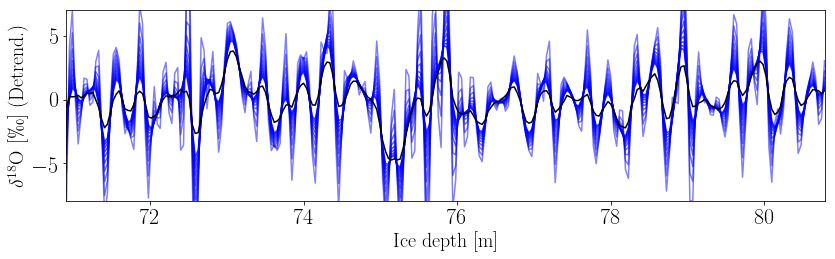

In [41]:
sigma_in_use = sigma_in[sigma_in < 0.09]
plt.rcParams.update({'font.size': 20})
alphas = np.linspace(0.5,0.8,len(sigma_in_use))[::-1]

figDecon1, axDecon1 = plt.subplots(figsize=(12,4))


for i in range(len(sigma_in_use)):
    axDecon1.plot(e[i][0], e[i][1], label='$\sigma = $ ' + str(round(sigma_in_use[i],3)), alpha=alphas[i], color='blue')
axDecon1.plot(depthA_LT_int, d18OA_LT_int-np.mean(d18OA_LT_int), color='k', label='Data')

axDecon1.tick_params(axis='both', which='major', labelsize=22)
axDecon1.set(ylim=(-8,7), xlim=(depthA_LT_int.min(),depthA_LT_int.max()), xlabel='Ice depth [m]', ylabel='$\delta ^{18}$O [\permil] (Detrend.)')
#axDecon1.legend(bbox_to_anchor=(0.67,0.57,0.5,0.5), fontsize=12)
figDecon1.tight_layout()

if saveFigs:
    figDecon1.savefig('../../WrittenWork/NovemberPresentation/SiteA_DeconComboAll.eps')

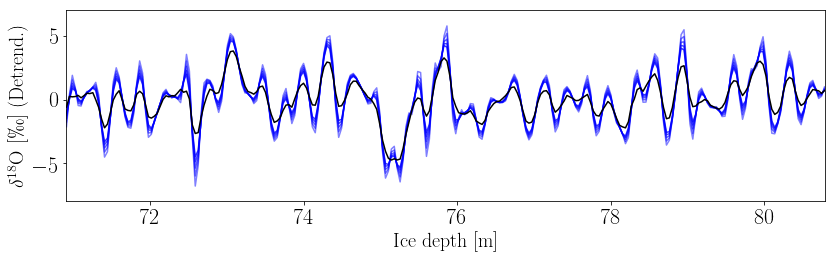

In [42]:
sigma_in_use = sigma_in[sigma_in < 0.07]
plt.rcParams.update({'font.size': 20})
alphas = np.linspace(0.5,0.8,len(sigma_in_use))[::-1]

figDecon1, axDecon1 = plt.subplots(figsize=(12,4))


for i in range(len(sigma_in_use)):
    axDecon1.plot(e[i][0], e[i][1], label='$\sigma = $ ' + str(round(sigma_in_use[i],3)), alpha=alphas[i], color='blue')
axDecon1.plot(depthA_LT_int, d18OA_LT_int-np.mean(d18OA_LT_int), color='k', label='Data')

axDecon1.tick_params(axis='both', which='major', labelsize=22)
axDecon1.set(ylim=(-8,7), xlim=(depthA_LT_int.min(),depthA_LT_int.max()), xlabel='Ice depth [m]', ylabel='$\delta ^{18}$O [\permil] (Detrend.)')
#axDecon1.legend(bbox_to_anchor=(0.67,0.57,0.5,0.5), fontsize=12)
figDecon1.tight_layout()

if saveFigs:
    figDecon1.savefig('../../WrittenWork/NovemberPresentation/SiteA_DeconComboFilt.eps')

# ECM and DEP examples

In [50]:
data_d18O_B22_LT = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/B22__LT.txt', ',')
data_d18O_B22 = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/Depth_d18O__B22.txt', '\t')
data_DEP_B22 = pd.read_csv('/home/thea/Documents/KUFysik/MesterTesen/Analysis/NovemberPresentation__code/Data_November/DepthDEP__Clean__B22.txt', '\t')


In [105]:
depthLT1 = data_d18O_B22_LT['depth'].min()
depthLT2 = data_d18O_B22_LT['depth'].max()+0.07

depth1 = data_d18O_B22_LT['depth'].min()-1
depth2 = data_d18O_B22_LT['depth'].max()+0.07+1

In [106]:
DEP_B22 = np.asarray(data_DEP_B22['cond'])
DEP_B22_depth = np.asarray(data_DEP_B22['depth'])

d18O_B22 = np.asarray(data_d18O_B22['d18O'])
d18O_B22_depth = np.asarray(data_d18O_B22['depth'])

In [109]:
DEP_B22_LT = DEP_B22[(DEP_B22_depth >= depthLT1) & (DEP_B22_depth <= depthLT2)]
DEP_B22_depth_LT = DEP_B22_depth[(DEP_B22_depth >= depthLT1) & (DEP_B22_depth <= depthLT2)]

d18O_B22_LT = d18O_B22[(d18O_B22_depth >= depthLT1) & (d18O_B22_depth <= depthLT2)]
d18O_B22_depth_LT = d18O_B22_depth[(d18O_B22_depth >= depthLT1) & (d18O_B22_depth <= depthLT2)]



DEP_B22_LTX = DEP_B22[(DEP_B22_depth >= depth1) & (DEP_B22_depth <= depth2)]
DEP_B22_depth_LTX = DEP_B22_depth[(DEP_B22_depth >= depth1) & (DEP_B22_depth <= depth2)]

d18O_B22_LTX = d18O_B22[(d18O_B22_depth >= depth1) & (d18O_B22_depth <= depth2)]
d18O_B22_depth_LTX = d18O_B22_depth[(d18O_B22_depth >= depth1) & (d18O_B22_depth <= depth2)]

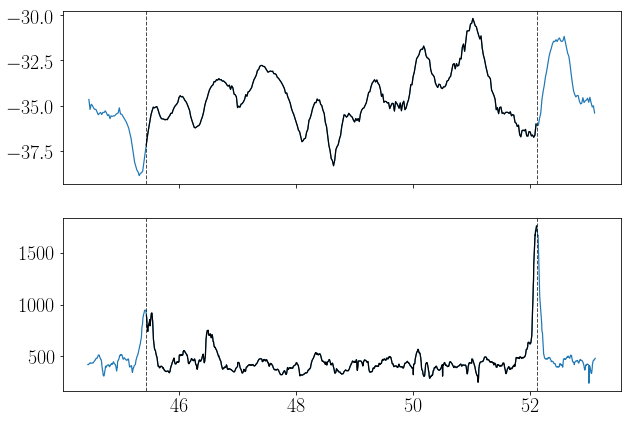

In [117]:
figDEP, axDEP = plt.subplots(2,1,figsize=(10,7),sharex=True)


axDEP[1].plot(DEP_B22_depth_LTX, DEP_B22_LTX, lw=1.2)
axDEP[0].plot(d18O_B22_depth_LTX, d18O_B22_LTX, lw=1.2)

axDEP[1].plot(DEP_B22_depth_LT, DEP_B22_LT, lw=1.2, color='k')
axDEP[0].plot(d18O_B22_depth_LT, d18O_B22_LT, lw=1.2, color='k')

axDEP[0].axvline(x=depth1+1, color='k', ls='--', alpha=0.7, lw=1)
axDEP[0].axvline(x=depth2-1, color='k', ls='--', alpha=0.7, lw=1)
axDEP[1].axvline(x=depth1+1, color='k', ls='--', alpha=0.7, lw=1)
axDEP[1].axvline(x=depth2-1, color='k', ls='--', alpha=0.7, lw=1)

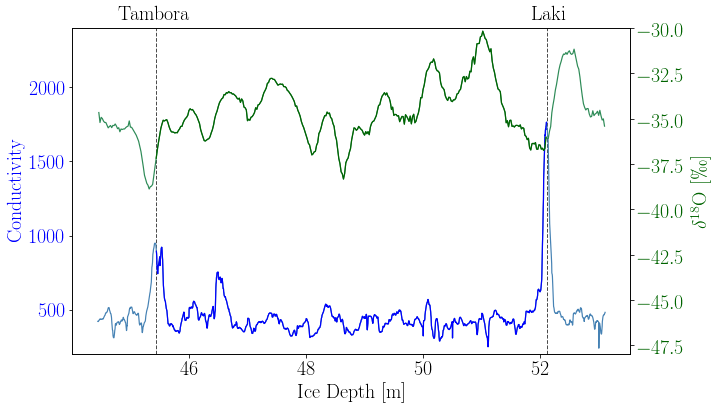

In [187]:
figDEP2, axDEP2 = plt.subplots(figsize=(10,6))
axDEP2.axvline(x=depthLT1, color='k', ls='--', alpha=0.7, lw=1)
axDEP2.axvline(x=depthLT2, color='k', ls='--', alpha=0.7, lw=1)
axDEP2.text(depthLT1-0.65,2450, 'Tambora')
axDEP2.text(depthLT2-0.25,2450, 'Laki')

axDEP2.set(ylim=(200,2400), xlabel='Ice Depth [m]')
axDEP2.set_ylabel('Conductivity', color='blue')
axDEP2.tick_params(axis='y', labelcolor='blue')
axDEP2.plot(DEP_B22_depth_LTX, DEP_B22_LTX, lw=1.2, color='steelblue')
axDEP2.plot(DEP_B22_depth_LT, DEP_B22_LT, lw=1.2, color='blue')

axDEP2_2 = axDEP2.twinx()

axDEP2_2.set(ylim=(-48,-30))
axDEP2_2.set_ylabel('$\delta^{18}$O [\permil]', color='darkgreen')
axDEP2_2.tick_params(axis='y', labelcolor='darkgreen')
axDEP2_2.plot(d18O_B22_depth_LTX, d18O_B22_LTX, lw=1.2, color='seagreen')
axDEP2_2.plot(d18O_B22_depth_LT, d18O_B22_LT, lw=1.2, color='darkgreen')


if saveFigs:
    figDEP2.savefig('../../WrittenWork/NovemberPresentation/B22_DEPexample.eps')

In [162]:
a = np.array([1,2,3,4,5,6])

In [168]:
a[:]

array([1, 2, 3, 4, 5, 6])

In [170]:

np.where(a==3)

(array([2]),)

In [189]:
200/62

3.225806451612903